<a href="https://colab.research.google.com/github/kzihon/Tensorflow-deep-learning/blob/main/02_Neural_Network_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
print(tf.__version__)

2.12.0


#Creating data to view and fit

In [2]:
from sklearn.datasets import make_circles

n_samples = 1000

X,y = make_circles(n_samples,
                   noise=0.03,
                   random_state=42)

In [3]:
X[:1], y[:3]

(array([[0.75424625, 0.23148074]]), array([1, 1, 1]))

In [4]:
import pandas as pd
circles= pd.DataFrame({
    "X1": X[:,0],
    "X2": X[:,1],
    "label":y
})
circles.head()

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0


In [5]:
pd.value_counts(circles['label'])

1    500
0    500
Name: label, dtype: int64

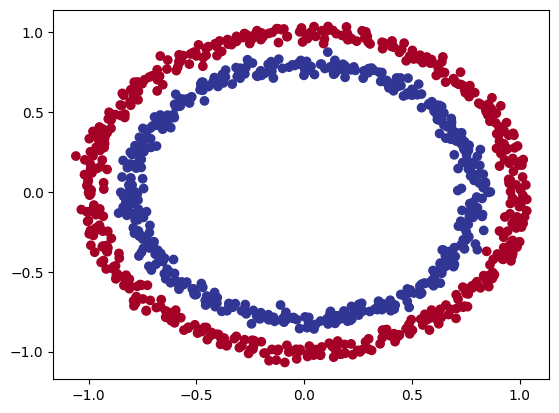

In [6]:
import matplotlib.pyplot as plt
plt.scatter(circles['X1'], circles['X2'],c=y, cmap=plt.cm.RdYlBu)

#steps in modeling

In [7]:
tf.random.set_seed(42)

model_1= tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.SGD(),
                metrics=['accuracy'])

model_1.fit(X,y,epochs=5)

Epoch 1/5
32/32 [==============================] - 7s 6ms/step - loss: 6.5142 - accuracy: 0.4850
Epoch 2/5
32/32 [==============================] - 0s 5ms/step - loss: 6.2647 - accuracy: 0.4570
Epoch 3/5
32/32 [==============================] - 0s 7ms/step - loss: 5.7798 - accuracy: 0.4150
Epoch 4/5
32/32 [==============================] - 0s 8ms/step - loss: 5.6843 - accuracy: 0.4330
Epoch 5/5
32/32 [==============================] - 0s 9ms/step - loss: 5.6364 - accuracy: 0.4330


In [8]:
model_1.fit(X,y, epochs=200, verbose=0)
model_1.evaluate(X,y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6935 - accuracy: 0.5000


[0.6934829950332642, 0.5]

In [9]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model (this time 3 layers)
model_3 = tf.keras.Sequential([
  # Before TensorFlow 2.7.0
  # tf.keras.layers.Dense(100), # add 100 dense neurons

  # With TensorFlow 2.7.0
  # tf.keras.layers.Dense(100, input_shape=(None, 1)), # add 100 dense neurons

  ## After TensorFlow 2.8.0 ##
  tf.keras.layers.Dense(100), # add 100 dense neurons
  tf.keras.layers.Dense(10), # add another layer with 10 neurons
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(), # use Adam instead of SGD
                metrics=['accuracy'])

# 3. Fit the model
model_3.fit(X, y, epochs=100, verbose=0) # fit for 100 passes of the data

In [10]:
import numpy as np
def plot_decision_boundary(model, X, y):
  """
  Plots the decision boundary created by a model predicting on X.
  This function has been adapted from two phenomenal resources:
   1. CS231n - https://cs231n.github.io/neural-networks-case-study/
   2. Made with ML basics - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
  """
  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))

  # Create X values (we're going to predict on all of these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together: https://numpy.org/devdocs/reference/generated/numpy.c_.html

  # Make predictions using the trained model
  y_pred = model.predict(x_in)

  # Check for multi-class
  if model.output_shape[-1] > 1: # checks the final dimension of the model's output shape, if this is > (greater than) 1, it's multi-class
    print("doing multiclass classification...")
    # We have to reshape our predictions to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classifcation...")
    y_pred = np.round(np.max(y_pred, axis=1)).reshape(xx.shape)

  # Plot decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

313/313 [==============================] - 1s 2ms/step
doing binary classifcation...


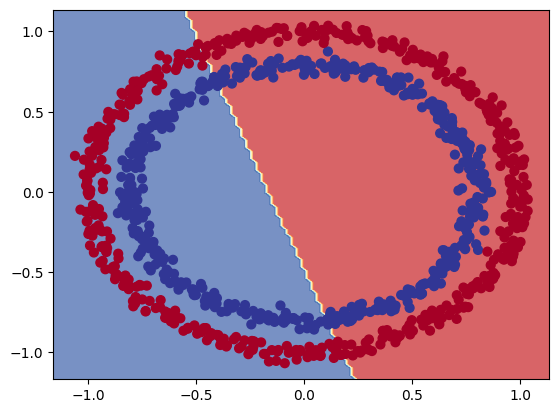

In [11]:
plot_decision_boundary(model_3, X, y)

In [12]:
model_3.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 100)               300       
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
 dense_3 (Dense)             (None, 1)                 11        
                                                                 
Total params: 1,321
Trainable params: 1,321
Non-trainable params: 0
_________________________________________________________________


#recteate model for regression

In [13]:
# Create some regression data
X_regression = np.arange(0, 1000, 5)
y_regression = np.arange(100, 1100, 5)

# Split it into training and test sets
X_reg_train = X_regression[:150]
X_reg_test = X_regression[150:]
y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]

In [14]:
# Setup random seed
tf.random.set_seed(42)

# Recreate the model
model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

# Change the loss and metrics of our compiled model
model_3.compile(loss=tf.keras.losses.mae, # change the loss function to be regression-specific
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['mae']) # change the metric to be regression-specific

# Fit the recompiled model
model_3.fit(tf.expand_dims(X_reg_train, axis=-1),
            y_reg_train,
            epochs=100)

Epoch 1/100
5/5 [==============================] - 1s 6ms/step - loss: 317.6664 - mae: 317.6664
Epoch 2/100
5/5 [==============================] - 0s 4ms/step - loss: 193.6653 - mae: 193.6653
Epoch 3/100
5/5 [==============================] - 0s 4ms/step - loss: 76.2002 - mae: 76.2002
Epoch 4/100
5/5 [==============================] - 0s 5ms/step - loss: 67.8786 - mae: 67.8786
Epoch 5/100
5/5 [==============================] - 0s 4ms/step - loss: 79.0517 - mae: 79.0517
Epoch 6/100
5/5 [==============================] - 0s 5ms/step - loss: 52.1985 - mae: 52.1985
Epoch 7/100
5/5 [==============================] - 0s 4ms/step - loss: 47.5381 - mae: 47.5381
Epoch 8/100
5/5 [==============================] - 0s 4ms/step - loss: 43.7069 - mae: 43.7069
Epoch 9/100
5/5 [==============================] - 0s 4ms/step - loss: 45.4046 - mae: 45.4046
Epoch 10/100
5/5 [==============================] - 0s 4ms/step - loss: 43.2109 - mae: 43.2109
Epoch 11/100
5/5 [==============================] - 0s 

2/2 [==============================] - 0s 5ms/step


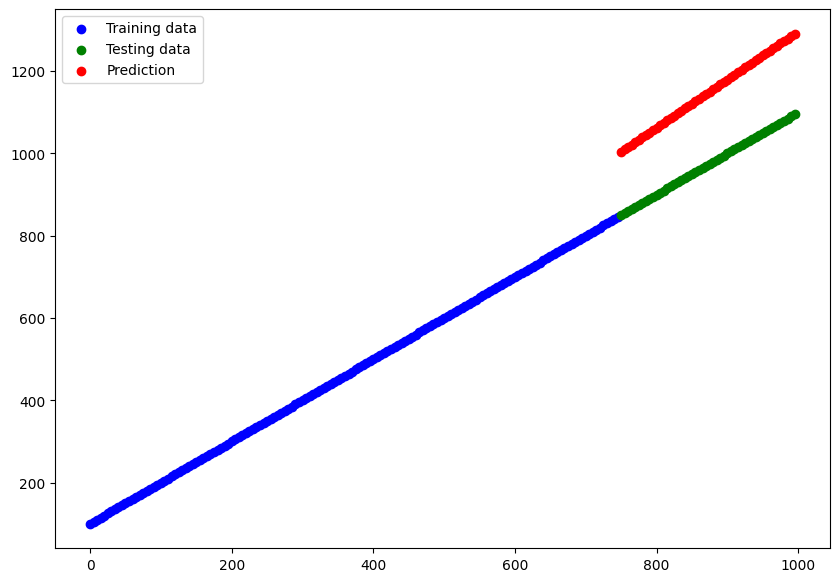

In [15]:
y_reg_preds=model_3.predict(y_reg_test)
plt.figure(figsize=(10,7))
plt.scatter(X_reg_train, y_reg_train, c='b', label='Training data')
plt.scatter(X_reg_test, y_reg_test, c='g', label='Testing data')
plt.scatter(X_reg_test, y_reg_preds.squeeze(), c='r', label='Prediction')
plt.legend()

In [16]:
# Set random seed
tf.random.set_seed(42)

# Create a model
model_6 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation=tf.keras.activations.relu), # hidden layer 1, 4 neurons, ReLU activation
  tf.keras.layers.Dense(4, activation=tf.keras.activations.relu), # hidden layer 2, 4 neurons, ReLU activation
  tf.keras.layers.Dense(1) # ouput layer
])

# Compile the model
model_6.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(lr=0.001), # Adam's default learning rate is 0.001
                metrics=['accuracy'])

# Fit the model
history = model_6.fit(X, y, epochs=100)


Epoch 1/100
32/32 [==============================] - 2s 6ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 2/100
32/32 [==============================] - 0s 6ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 3/100
32/32 [==============================] - 0s 5ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 4/100
32/32 [==============================] - 0s 5ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 5/100
32/32 [==============================] - 0s 4ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 6/100
32/32 [==============================] - 0s 4ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 7/100
32/32 [==============================] - 0s 4ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 8/100
32/32 [==============================] - 0s 4ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 9/100
32/32 [==============================] - 0s 4ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 10/100
32/32 [==============================] - 0s 4ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 11/

313/313 [==============================] - 1s 2ms/step
doing binary classifcation...


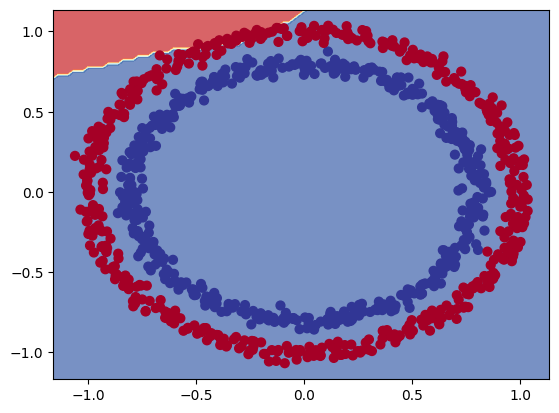

In [17]:

# Check out the predictions using 2 hidden layers
plot_decision_boundary(model_6, X, y)

In [18]:
# Set random seed
tf.random.set_seed(42)

# Create a model
model_7 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation=tf.keras.activations.relu), # hidden layer 1, ReLU activation
  tf.keras.layers.Dense(4, activation=tf.keras.activations.relu), # hidden layer 2, ReLU activation
  tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid) # ouput layer, sigmoid activation
])

# Compile the model
model_7.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# Fit the model
history = model_7.fit(X, y, epochs=100, verbose=0)

In [19]:
model_7.evaluate(X,y)

32/32 [==============================] - 0s 3ms/step - loss: 0.4049 - accuracy: 0.8860


[0.40485355257987976, 0.8859999775886536]

313/313 [==============================] - 1s 2ms/step
doing binary classifcation...


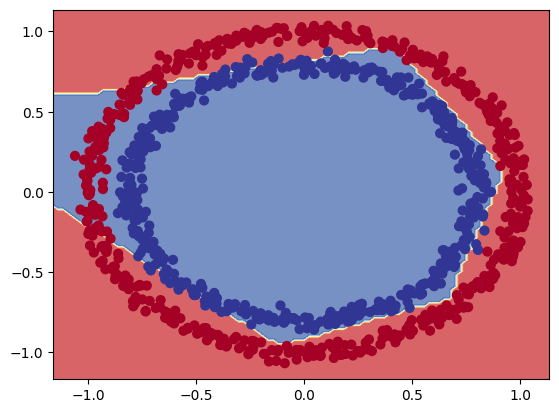

In [20]:
# View the predictions of the model with relu and sigmoid activations
plot_decision_boundary(model_7, X, y)

In [21]:
len(X)

1000

In [28]:
X_train, y_train=X[:800], y[:800]
X_test, y_test=X[800:], y[800:]

In [25]:
X_train.shape, X_test.shape

((800, 2), (200, 2))

In [29]:
tf.random.set_seed(42)
model_8=tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid'),

])
model_8.compile(loss= tf.keras.losses.binary_crossentropy,
                optimizer= tf.keras.optimizers.Adam(lr=0.01),
                metrics=['accuracy'])

model_8.fit(X_train, y_train, epochs=25)


Epoch 1/25
25/25 [==============================] - 1s 4ms/step - loss: 0.6965 - accuracy: 0.4825
Epoch 2/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6951 - accuracy: 0.4475
Epoch 3/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6944 - accuracy: 0.4750
Epoch 4/25
25/25 [==============================] - 0s 4ms/step - loss: 0.6936 - accuracy: 0.4825
Epoch 5/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6932 - accuracy: 0.4938
Epoch 6/25
25/25 [==============================] - 0s 5ms/step - loss: 0.6928 - accuracy: 0.4900
Epoch 7/25
25/25 [==============================] - 0s 5ms/step - loss: 0.6922 - accuracy: 0.4988
Epoch 8/25
25/25 [==============================] - 0s 5ms/step - loss: 0.6918 - accuracy: 0.4900
Epoch 9/25
25/25 [==============================] - 0s 5ms/step - loss: 0.6914 - accuracy: 0.5100
Epoch 10/25
25/25 [==============================] - 0s 6ms/step - loss: 0.6909 - accuracy: 0.5138
Epoch 11/25
25/25 [

In [30]:
loss, accuracy= model_8.evaluate(X_test, y_test)

7/7 [==============================] - 0s 4ms/step - loss: 0.6903 - accuracy: 0.4850


In [32]:
print(f"model loss on tehst set:{loss}")
print(f"model accuracy on test set:{100*accuracy:.2f}%")

model loss on tehst set:0.6902540326118469
model accuracy on test set:48.50%


In [33]:
model_7.evaluate(X_test, y_test)

7/7 [==============================] - 0s 4ms/step - loss: 0.3948 - accuracy: 0.8850


[0.39479461312294006, 0.8849999904632568]

313/313 [==============================] - 1s 2ms/step
doing binary classifcation...
313/313 [==============================] - 1s 2ms/step
doing binary classifcation...


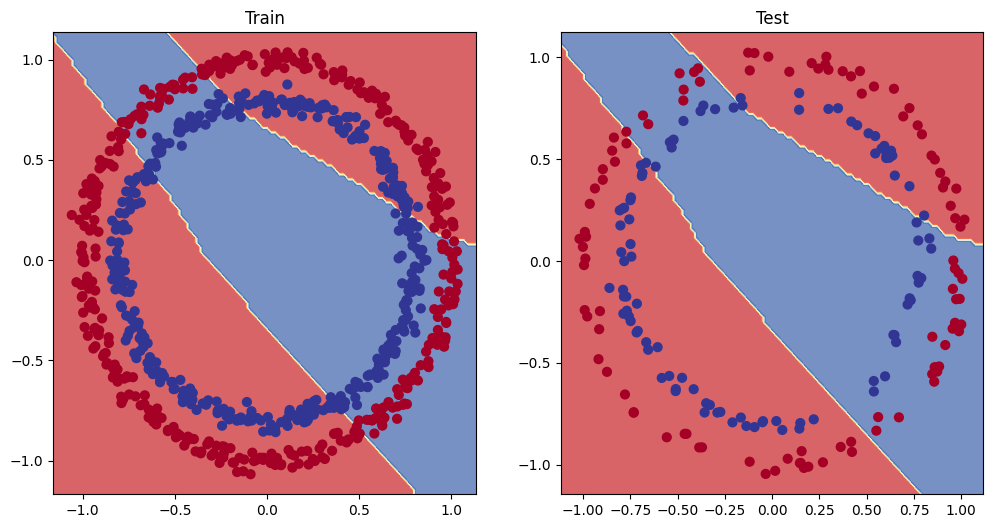

In [36]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_8, X=X_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_8, X=X_test, y=y_test)
plt.show()


In [38]:
pd.DataFrame(history.history)

,loss,accuracy
0,0.696078,0.498
1,0.695351,0.480
2,0.694739,0.504
3,0.694279,0.487
4,0.693922,0.485
...,...,...
95,0.429402,0.877
96,0.423863,0.870
97,0.417799,0.874
98,0.413543,0.887


Text(0.5, 1.0, 'Model_8 training curves')

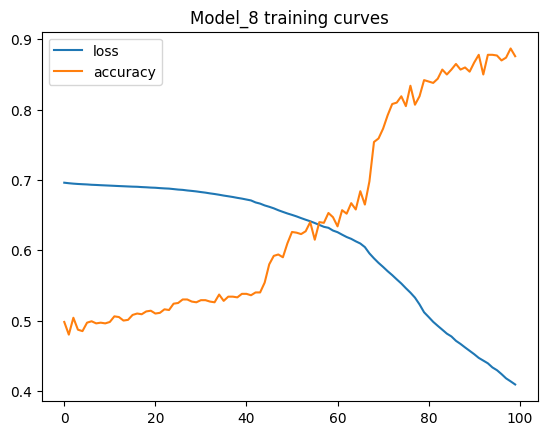

In [39]:
pd.DataFrame(history.history).plot()
plt.title("Model_8 training curves")

In [41]:
# Set random seed
tf.random.set_seed(42)

# Create a model (same as model_8)
model_9 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model_9.compile(loss="binary_crossentropy", # we can use strings here too
              optimizer="Adam", # same as tf.keras.optimizers.Adam() with default settings
              metrics=["accuracy"])

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch:1e-4 * 10**(epoch/20))# traverse a set of learning rate values starting from 1e-4, increasing by 10**(epoch/20) every epoch

history =model_9.fit(X_train, y_train, epochs=100, callbacks=[lr_scheduler])


Epoch 1/100
25/25 [==============================] - 1s 3ms/step - loss: 0.7591 - accuracy: 0.4913 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 3ms/step - loss: 0.7562 - accuracy: 0.4950 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 3ms/step - loss: 0.7531 - accuracy: 0.4913 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 3ms/step - loss: 0.7497 - accuracy: 0.4925 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 3ms/step - loss: 0.7463 - accuracy: 0.4888 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 3ms/step - loss: 0.7424 - accuracy: 0.4888 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 3ms/step - loss: 0.7387 - accuracy: 0.4888 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 3ms/step - loss: 0.7346 - accuracy: 0.4925 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 3ms/step - loss:

<Axes: xlabel='epochs'>

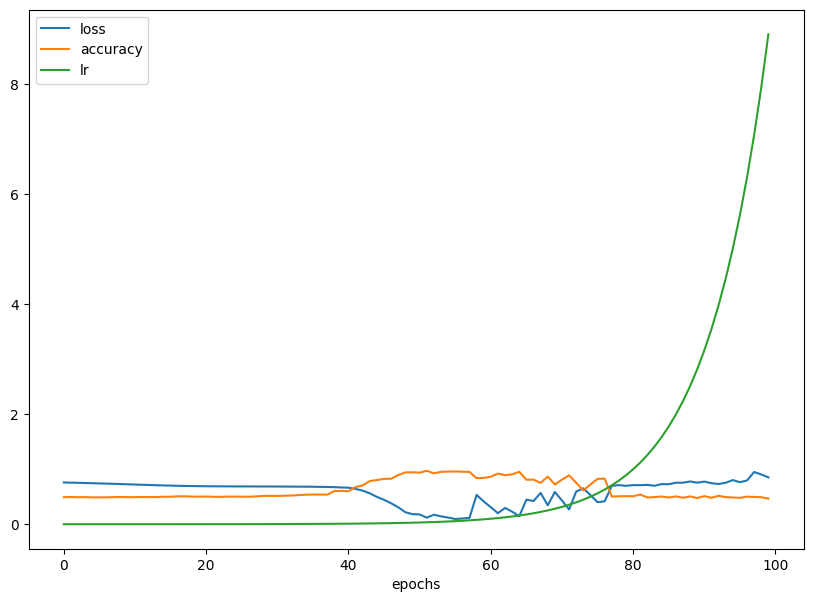

In [42]:
pd.DataFrame(history.history).plot(figsize=(10,7), xlabel="epochs")

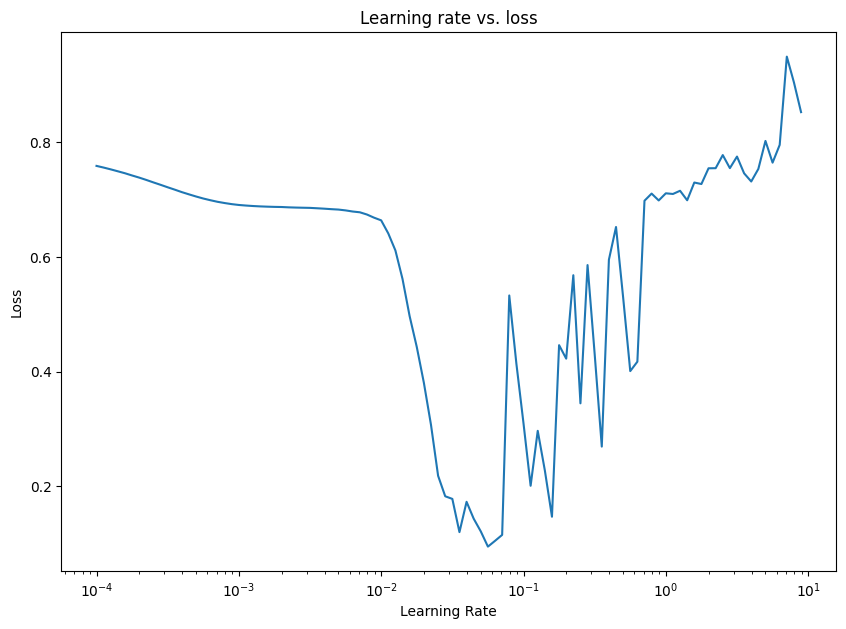

In [44]:
lrs = 1e-4 *(10 **(np.arange(100)/20))
plt.figure(figsize=(10,7))
plt.semilogx(lrs, history.history["loss"])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning rate vs. loss");

To figure out the ideal value of the learning rate (at least the ideal value to begin training our model), the rule of thumb is to take the learning rate value where the loss is still decreasing but not quite flattened out (usually about 10x smaller than the bottom of the curve).

In this case, our ideal learning rate ends up between 0.01 (
) and 0.02.



In [51]:

# Set the random seed
tf.random.set_seed(42)

# Create the model
model_10 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model with the ideal learning rate
model_10.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(lr=0.02), # to adjust the learning rate, you need to use tf.keras.optimizers.Adam (not "adam")
                metrics=["accuracy"])

# Fit the model for 20 epochs (5 less than before)
history = model_10.fit(X_train, y_train, epochs=20)

Epoch 1/20
25/25 [==============================] - 2s 5ms/step - loss: 0.7287 - accuracy: 0.4988
Epoch 2/20
25/25 [==============================] - 0s 5ms/step - loss: 0.7186 - accuracy: 0.4988
Epoch 3/20
25/25 [==============================] - 0s 5ms/step - loss: 0.7125 - accuracy: 0.4963
Epoch 4/20
25/25 [==============================] - 0s 5ms/step - loss: 0.7083 - accuracy: 0.4900
Epoch 5/20
25/25 [==============================] - 0s 5ms/step - loss: 0.7054 - accuracy: 0.4700
Epoch 6/20
25/25 [==============================] - 0s 4ms/step - loss: 0.7034 - accuracy: 0.4500
Epoch 7/20
25/25 [==============================] - 0s 4ms/step - loss: 0.7013 - accuracy: 0.4588
Epoch 8/20
25/25 [==============================] - 0s 5ms/step - loss: 0.7001 - accuracy: 0.4387
Epoch 9/20
25/25 [==============================] - 0s 5ms/step - loss: 0.6986 - accuracy: 0.4125
Epoch 10/20
25/25 [==============================] - 0s 5ms/step - loss: 0.6971 - accuracy: 0.4550
Epoch 11/20
25/25 [

In [52]:
# Evaluate model on the test dataset
model_10.evaluate(X_test, y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.6905 - accuracy: 0.4950


[0.6905019879341125, 0.4950000047683716]

313/313 [==============================] - 1s 2ms/step
doing binary classifcation...
313/313 [==============================] - 1s 2ms/step
doing binary classifcation...


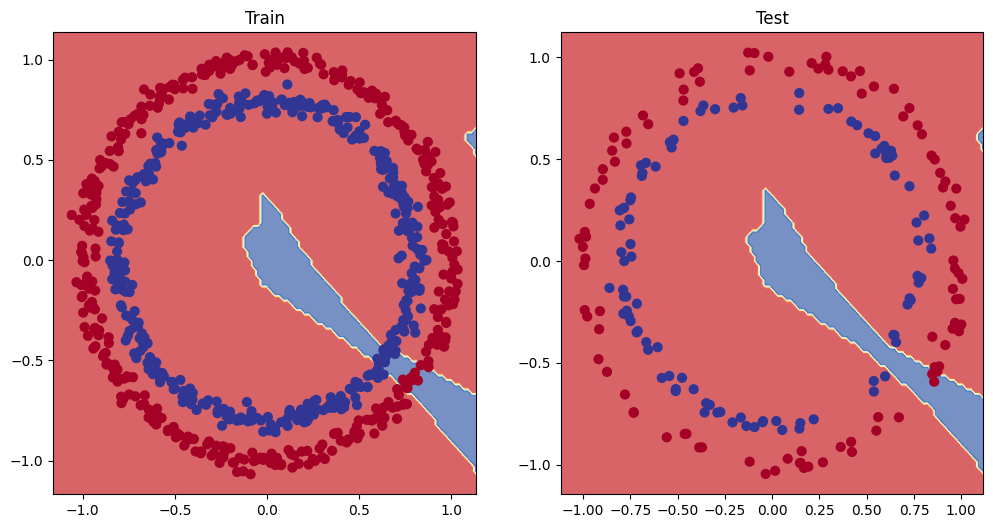

In [54]:
# Plot the decision boundaries for the training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_10, X=X_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_10, X=X_test, y=y_test)
plt.show()



In [56]:
# Create a confusion matrix
from sklearn.metrics import confusion_matrix

In [58]:
y_preds= model_10.predict(X_test)
confusion_matrix(y_test, tf.round(y_preds))

7/7 [==============================] - 0s 4ms/step


array([[99,  2],
       [99,  0]])

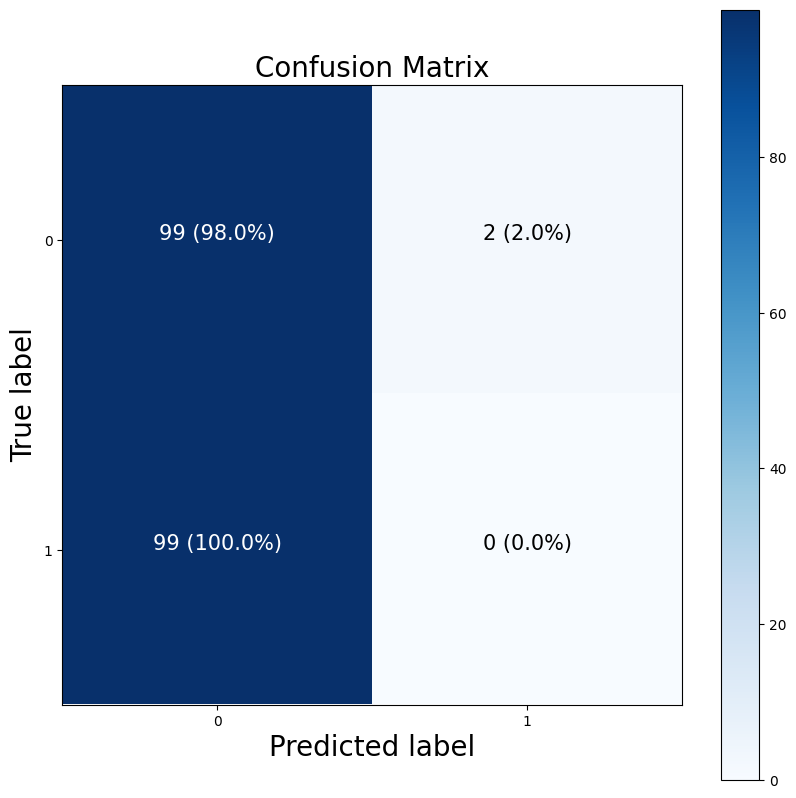

In [59]:
# Note: The following confusion matrix code is a remix of Scikit-Learn's
# plot_confusion_matrix function - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html
# and Made with ML's introductory notebook - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
import itertools

figsize = (10, 10)

# Create the confusion matrix
cm = confusion_matrix(y_test, tf.round(y_preds))
cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
n_classes = cm.shape[0]

# Let's prettify it
fig, ax = plt.subplots(figsize=figsize)
# Create a matrix plot
cax = ax.matshow(cm, cmap=plt.cm.Blues) # https://matplotlib.org/3.2.0/api/_as_gen/matplotlib.axes.Axes.matshow.html
fig.colorbar(cax)

# Create classes
classes = False

if classes:
  labels = classes
else:
  labels = np.arange(cm.shape[0])

# Label the axes
ax.set(title="Confusion Matrix",
       xlabel="Predicted label",
       ylabel="True label",
       xticks=np.arange(n_classes),
       yticks=np.arange(n_classes),
       xticklabels=labels,
       yticklabels=labels)

# Set x-axis labels to bottom
ax.xaxis.set_label_position("bottom")
ax.xaxis.tick_bottom()

# Adjust label size
ax.xaxis.label.set_size(20)
ax.yaxis.label.set_size(20)
ax.title.set_size(20)

# Set threshold for different colors
threshold = (cm.max() + cm.min()) / 2.

# Plot the text on each cell
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
           horizontalalignment="center",
           color="white" if cm[i, j] > threshold else "black",
           size=15)

In [60]:
# What does itertools.product do? Combines two things into each combination
import itertools
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  print(i, j)


0 0
0 1
1 0
1 1


#Working with a larger example (multiclass classification)

In [107]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

(train_data, train_labels),(test_data, test_labels)=fashion_mnist.load_data()

In [63]:
print(f"Training sample:\n{train_data[0]}\n")
print(f"Training label: {train_labels[0]}")

Training sample:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1  

In [67]:
train_data.shape, train_labels.shape, test_data.shape, test_lables.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [69]:
train_data[0].shape, train_labels[0].shape

((28, 28), ())

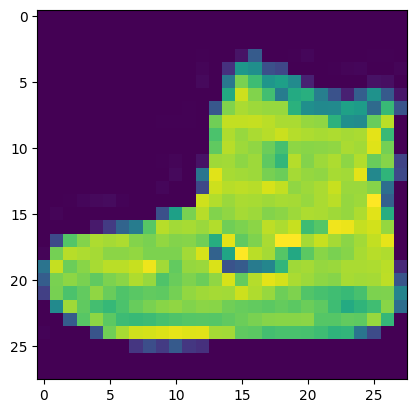

In [91]:
plt.imshow(train_data[0])

In [79]:
train_labels[7]

2

In [86]:
pd.value_counts(train_labels)

9    6000
0    6000
3    6000
2    6000
7    6000
5    6000
1    6000
6    6000
4    6000
8    6000
dtype: int64

In [87]:

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# How many classes are there (this'll be our output shape)?
len(class_names)

10

Text(0.5, 1.0, 'T-shirt/top')

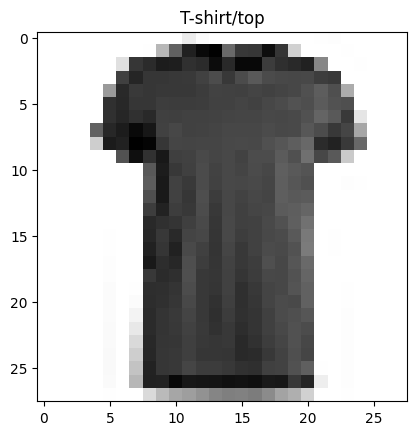

In [94]:
plt.imshow(train_data[17], cmap=plt.cm.binary)
plt.title(class_names[train_labels[17]])

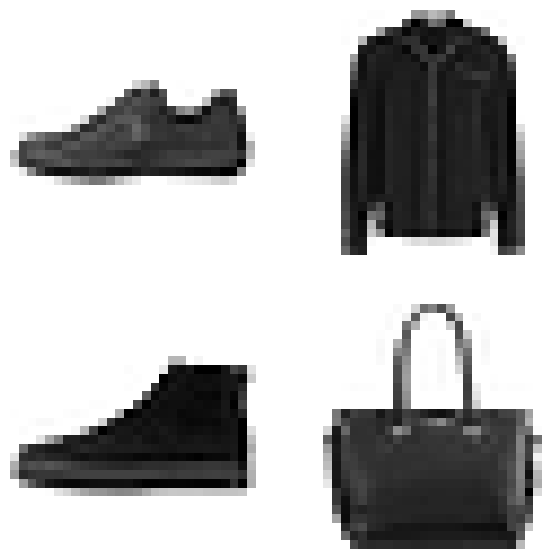

In [104]:
import random

plt.figure(figsize=(7,7))
for i in range(4):
  ax=plt.subplot(2,2,i+1)
  rand_index = random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
  plt.axis(False)


In [109]:
tf.random.set_seed(42)

model_11=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

model_11.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer= tf.keras.optimizers.Adam(),
                 metrics=['accuracy'])

non_norm_history=model_11.fit(train_data, train_labels, epochs=10, validation_data=(test_data, test_labels))

Epoch 1/10
1875/1875 [==============================] - 13s 6ms/step - loss: 2.3475 - accuracy: 0.0987 - val_loss: 2.3038 - val_accuracy: 0.1000
Epoch 2/10
1875/1875 [==============================] - 11s 6ms/step - loss: 2.3028 - accuracy: 0.0985 - val_loss: 2.3038 - val_accuracy: 0.1000
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3027 - accuracy: 0.1002 - val_loss: 2.3038 - val_accuracy: 0.1000
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 2.3028 - accuracy: 0.0975 - val_loss: 2.3037 - val_accuracy: 0.0999
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3028 - accuracy: 0.0973 - val_loss: 2.3037 - val_accuracy: 0.1000
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 2.3028 - accuracy: 0.0992 - val_loss: 2.3037 - val_accuracy: 0.1000
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3028 - accuracy: 0.0987 - val_loss: 2.3037 - val_accurac

In [110]:
model_11.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_40 (Dense)            (None, 4)                 3140      
                                                                 
 dense_41 (Dense)            (None, 4)                 20        
                                                                 
 dense_42 (Dense)            (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


In [111]:
train_data.min(), train_data.max()

(0, 255)

In [112]:
train_data=train_data/255.0
test_data=test_data/255.0
train_data.min(), train_data.max()

(0.0, 1.0)

In [116]:
tf.random.set_seed(42)

model_12= tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10,activation= "softmax")
])

model_12.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer= tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

norm_history= model_12.fit(train_data, train_labels, epochs=10, validation_data=(test_data, test_lables))

Epoch 1/10
1875/1875 [==============================] - 9s 3ms/step - loss: 1.6112 - accuracy: 0.3552 - val_loss: 1.1842 - val_accuracy: 0.5231
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 1.0585 - accuracy: 0.5738 - val_loss: 1.0067 - val_accuracy: 0.6041
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.9637 - accuracy: 0.6087 - val_loss: 0.9526 - val_accuracy: 0.6212
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.8766 - accuracy: 0.6365 - val_loss: 0.8586 - val_accuracy: 0.6381
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.8196 - accuracy: 0.6510 - val_loss: 0.8365 - val_accuracy: 0.6553
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.7953 - accuracy: 0.6621 - val_loss: 0.8238 - val_accuracy: 0.6503
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.7256 - accuracy: 0.7159 - val_loss: 0.7304 - val_accuracy:

<Axes: title={'center': 'normalized data'}>

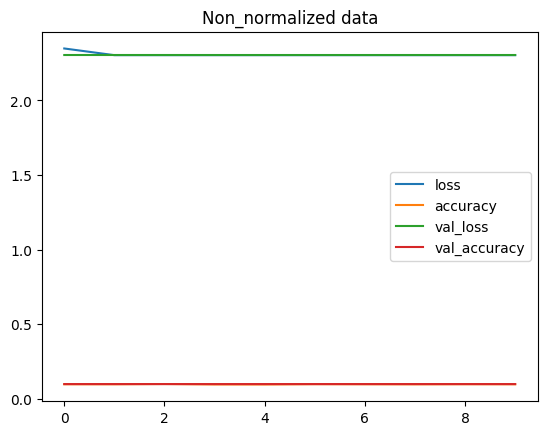

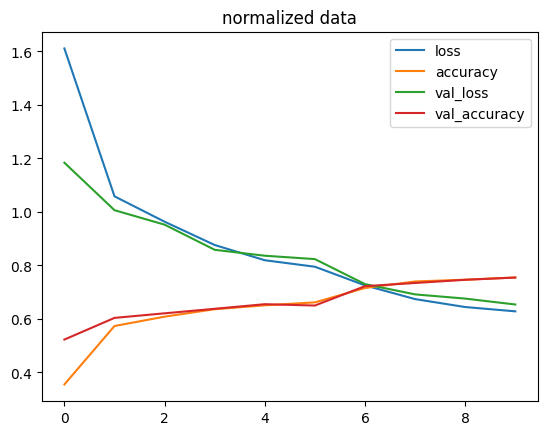

In [117]:
pd.DataFrame(non_norm_history.history).plot(title="Non_normalized data")
pd.DataFrame(norm_history.history).plot(title="normalized data")

In [119]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_13 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), # input layer (we had to reshape 28x28 to 784)
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax") # output shape is 10, activation is softmax
])

# Compile the model
model_13.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Create the learning rate callback
lr_scheduler= tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10 **(epoch/20))

find_lr_history= model_13.fit(train_data, train_labels, epochs=40, validation_data=(test_data, test_labels), callbacks=[lr_scheduler])

Epoch 1/40
1875/1875 [==============================] - 8s 3ms/step - loss: 1.5033 - accuracy: 0.3735 - val_loss: 1.2947 - val_accuracy: 0.4935 - lr: 0.0010
Epoch 2/40
1875/1875 [==============================] - 7s 4ms/step - loss: 1.1951 - accuracy: 0.5181 - val_loss: 1.1465 - val_accuracy: 0.5507 - lr: 0.0011
Epoch 3/40
1875/1875 [==============================] - 7s 4ms/step - loss: 1.0983 - accuracy: 0.5584 - val_loss: 1.0885 - val_accuracy: 0.5761 - lr: 0.0013
Epoch 4/40
1875/1875 [==============================] - 7s 3ms/step - loss: 1.0412 - accuracy: 0.5819 - val_loss: 1.0423 - val_accuracy: 0.5830 - lr: 0.0014
Epoch 5/40
1875/1875 [==============================] - 7s 4ms/step - loss: 1.0040 - accuracy: 0.5970 - val_loss: 1.0042 - val_accuracy: 0.6178 - lr: 0.0016
Epoch 6/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.9555 - accuracy: 0.6213 - val_loss: 0.9543 - val_accuracy: 0.6306 - lr: 0.0018
Epoch 7/40
1875/1875 [==============================] - 7s

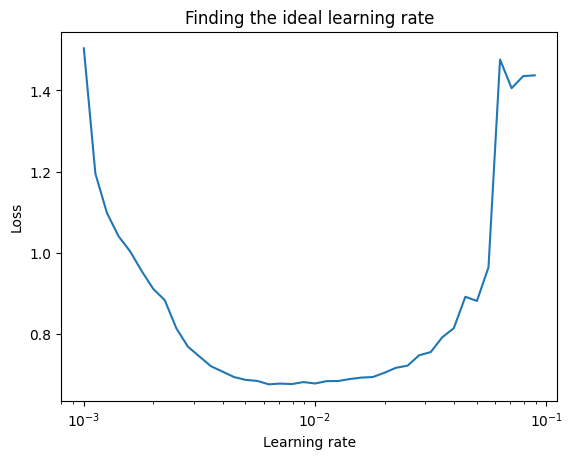

In [120]:
# Plot the learning rate decay curve
import numpy as np
import matplotlib.pyplot as plt
lrs = 1e-3 * (10**(np.arange(40)/20))
plt.semilogx(lrs, find_lr_history.history["loss"]) # want the x-axis to be log-scale
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Finding the ideal learning rate");

In [121]:


# Set random seed
tf.random.set_seed(42)

# Create the model
model_14 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), # input layer (we had to reshape 28x28 to 784)
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax") # output shape is 10, activation is softmax
])

# Compile the model
model_14.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(lr=0.001), # ideal learning rate (same as default)
                 metrics=["accuracy"])

# Fit the model
history = model_14.fit(train_data,
                       train_labels,
                       epochs=20,
                       validation_data=(test_data, test_labels))

Epoch 1/20
1875/1875 [==============================] - 8s 4ms/step - loss: 1.5610 - accuracy: 0.3868 - val_loss: 1.2208 - val_accuracy: 0.5282
Epoch 2/20
1875/1875 [==============================] - 6s 3ms/step - loss: 1.0511 - accuracy: 0.6082 - val_loss: 0.9554 - val_accuracy: 0.6460
Epoch 3/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.7970 - accuracy: 0.7152 - val_loss: 0.7564 - val_accuracy: 0.7339
Epoch 4/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.6762 - accuracy: 0.7662 - val_loss: 0.6567 - val_accuracy: 0.7770
Epoch 5/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5946 - accuracy: 0.7995 - val_loss: 0.5972 - val_accuracy: 0.7977
Epoch 6/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5543 - accuracy: 0.8129 - val_loss: 0.5794 - val_accuracy: 0.8053
Epoch 7/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5342 - accuracy: 0.8191 - val_loss: 0.5997 - val_accuracy:

In [122]:
# Note: The following confusion matrix code is a remix of Scikit-Learn's
# plot_confusion_matrix function - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html
# and Made with ML's introductory notebook - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
import itertools
from sklearn.metrics import confusion_matrix

# Our function needs a different name to sklearn's plot_confusion_matrix
def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15):
  """Makes a labelled confusion matrix comparing predictions and ground truth labels.

  If classes is passed, confusion matrix will be labelled, if not, integer class values
  will be used.

  Args:
    y_true: Array of truth labels (must be same shape as y_pred).
    y_pred: Array of predicted labels (must be same shape as y_true).
    classes: Array of class labels (e.g. string form). If `None`, integer labels are used.
    figsize: Size of output figure (default=(10, 10)).
    text_size: Size of output figure text (default=15).

  Returns:
    A labelled confusion matrix plot comparing y_true and y_pred.

  Example usage:
    make_confusion_matrix(y_true=test_labels, # ground truth test labels
                          y_pred=y_preds, # predicted labels
                          classes=class_names, # array of class label names
                          figsize=(15, 15),
                          text_size=10)
  """
  # Create the confustion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
  n_classes = cm.shape[0] # find the number of classes we're dealing with

  # Plot the figure and make it pretty
  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues) # colors will represent how 'correct' a class is, darker == better
  fig.colorbar(cax)

  # Are there a list of classes?
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  # Label the axes
  ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes), # create enough axis slots for each class
         yticks=np.arange(n_classes),
         xticklabels=labels, # axes will labeled with class names (if they exist) or ints
         yticklabels=labels)

  # Make x-axis labels appear on bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Set the threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
             horizontalalignment="center",
             color="white" if cm[i, j] > threshold else "black",
             size=text_size)


In [123]:

# Make predictions with the most recent model
y_probs = model_14.predict(test_data) # "probs" is short for probabilities

# View the first 5 predictions
y_probs[:5]

313/313 [==============================] - 1s 2ms/step


array([[2.04097191e-07, 2.09748196e-05, 1.11042468e-07, 3.18279963e-05,
        6.08299570e-06, 2.83359438e-02, 1.65713033e-07, 1.76823407e-01,
        1.52986577e-05, 7.94766068e-01],
       [4.60454990e-04, 9.52507939e-09, 8.79304409e-01, 5.99684936e-05,
        9.69563052e-03, 0.00000000e+00, 1.10479541e-01, 0.00000000e+00,
        4.30237463e-08, 0.00000000e+00],
       [1.11952850e-05, 9.99892116e-01, 1.83594839e-09, 7.86399105e-05,
        1.44722808e-05, 5.75505483e-31, 3.53339146e-06, 0.00000000e+00,
        3.56970963e-12, 5.21362739e-35],
       [3.17865059e-08, 9.99966741e-01, 6.08567407e-12, 3.25366636e-05,
        7.29128942e-07, 2.64829661e-29, 1.83017645e-09, 0.00000000e+00,
        4.67835736e-15, 3.48584739e-31],
       [3.37187618e-01, 2.67677911e-04, 6.29896000e-02, 7.05593377e-02,
        9.68853943e-03, 4.74807537e-14, 5.08362830e-01, 1.25497006e-37,
        1.09444065e-02, 8.32914842e-24]], dtype=float32)

In [124]:

# See the predicted class number and label for the first example
y_probs[0].argmax(), class_names[y_probs[0].argmax()]

(9, 'Ankle boot')

In [126]:
y_preds= y_probs.argmax(axis=1)
y_preds[:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

In [127]:
confusion_matrix(y_true=test_labels, y_pred= y_preds)

array([[787,   9,  10,  53,   6,   0, 109,   0,  25,   1],
       [  0, 953,   1,  29,  12,   0,   3,   0,   2,   0],
       [ 17,   2, 609,   8, 202,   0, 145,   0,  17,   0],
       [ 32,  13,  21, 839,  45,   1,  39,   0,   9,   1],
       [  0,   1,  56,  27, 814,   0,  93,   0,   9,   0],
       [  0,   0,   0,   1,   1, 864,   0,  69,  22,  43],
       [144,   6,  75,  43, 129,   0, 556,   0,  47,   0],
       [  0,   0,   0,   0,   0,  33,   0, 940,   1,  26],
       [  1,   1,   4,   9,   5,   5,  29,   9, 937,   0],
       [  0,   0,   0,   0,   1,  18,   0,  63,   1, 917]])

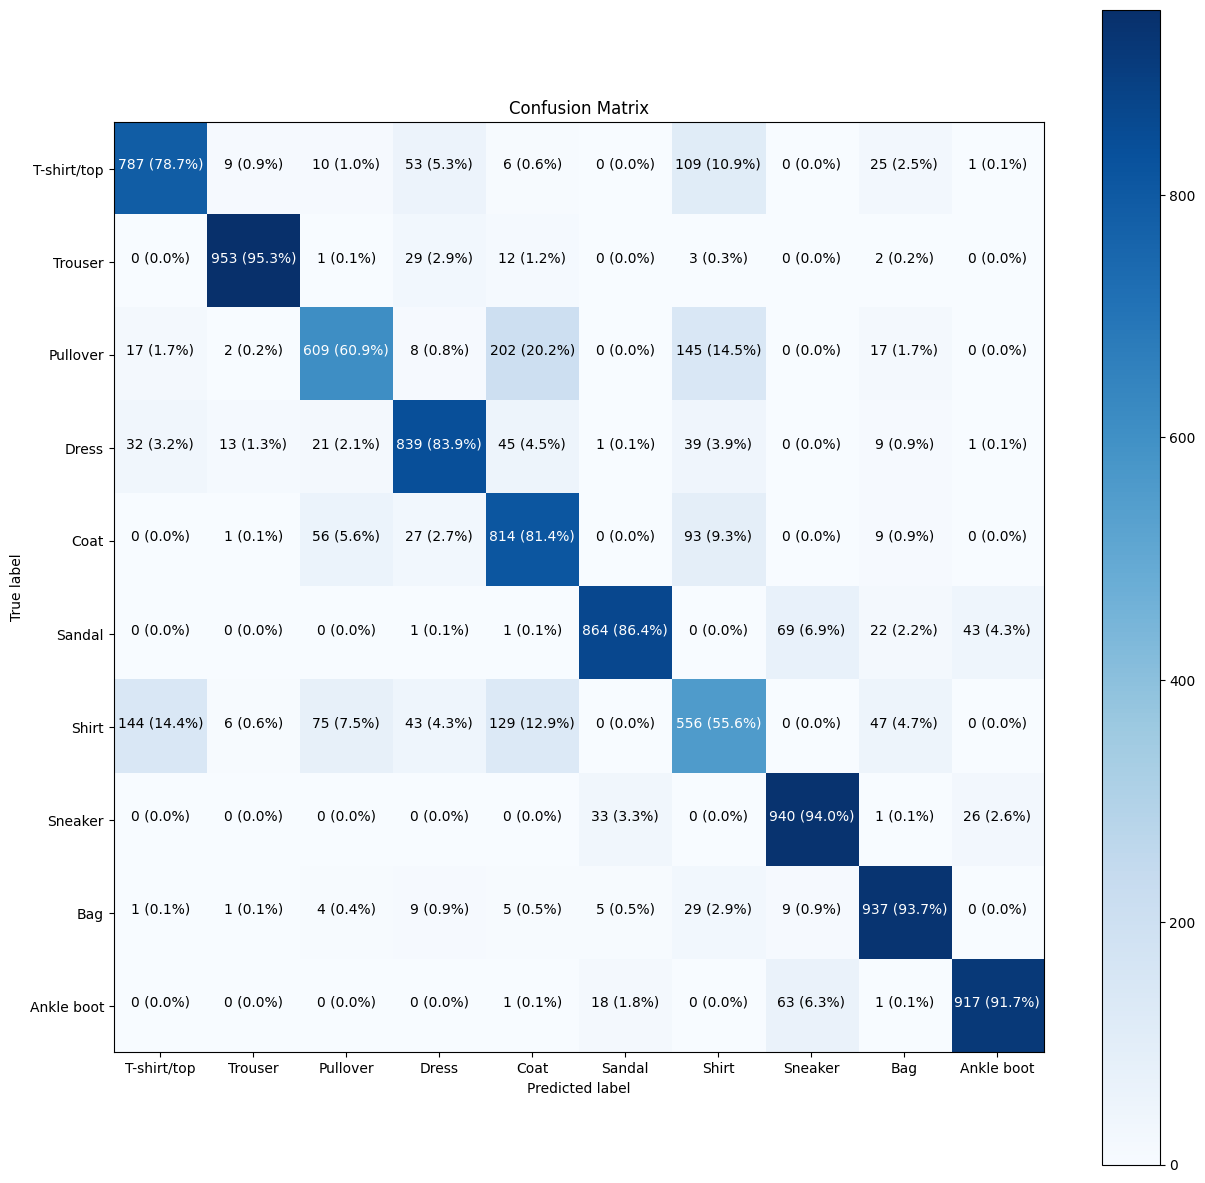

In [128]:

# Make a prettier confusion matrix
make_confusion_matrix(y_true=test_labels,
                      y_pred=y_preds,
                      classes=class_names,
                      figsize=(15, 15),
                      text_size=10)


In [129]:
import random

# Create a function for plotting a random image along with its prediction
def plot_random_image(model, images, true_labels, classes):
  """Picks a random image, plots it and labels it with a predicted and truth label.

  Args:
    model: a trained model (trained on data similar to what's in images).
    images: a set of random images (in tensor form).
    true_labels: array of ground truth labels for images.
    classes: array of class names for images.

  Returns:
    A plot of a random image from `images` with a predicted class label from `model`
    as well as the truth class label from `true_labels`.
  """
  # Setup random integer
  i = random.randint(0, len(images))

  # Create predictions and targets
  target_image = images[i]
  pred_probs = model.predict(target_image.reshape(1, 28, 28)) # have to reshape to get into right size for model
  pred_label = classes[pred_probs.argmax()]
  true_label = classes[true_labels[i]]

  # Plot the target image
  plt.imshow(target_image, cmap=plt.cm.binary)

  # Change the color of the titles depending on if the prediction is right or wrong
  if pred_label == true_label:
    color = "green"
  else:
    color = "red"

  # Add xlabel information (prediction/true label)
  plt.xlabel("Pred: {} {:2.0f}% (True: {})".format(pred_label,
                                                   100*tf.reduce_max(pred_probs),
                                                   true_label),
             color=color) # set the color to green or red

1/1 [==============================] - 0s 29ms/step


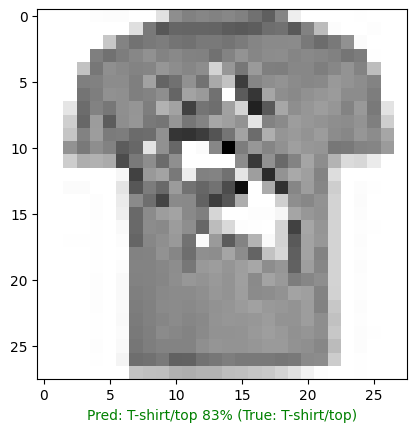

In [131]:
plot_random_image(model=model_14,
                  images=test_data,
                  true_labels=test_labels,
                  classes=class_names)

#What patterns is our model learning?

In [133]:
model_14.layers

In [136]:

# Get the patterns of a layer in our network
weights, biases = model_14.layers[1].get_weights()

# Shape = 1 weight matrix the size of our input data (28x28) per neuron (4)
weights, weights.shape

(array([[ 0.60296786,  0.13599803, -0.8503456 ,  0.52124447],
        [ 0.9485272 ,  0.32151064, -0.25811192,  0.55589706],
        [ 1.1520361 ,  0.13551162, -0.81587845,  0.9090157 ],
        ...,
        [ 0.11288716, -0.08892013,  0.22263856,  0.1148973 ],
        [-0.351199  ,  0.566245  ,  0.94392955,  0.7900744 ],
        [ 0.18595582,  0.30081457,  0.18725029,  0.08523792]],
       dtype=float32),
 (784, 4))

In [137]:
# Shape = 1 bias per neuron (we use 4 neurons in the first layer)
biases, biases.shape

(array([ 2.2676718 , -0.16765594,  0.12088954,  1.9090663 ], dtype=float32),
 (4,))

In [138]:

# Can now calculate the number of paramters in our model
model_14.summary()


Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_8 (Flatten)         (None, 784)               0         
                                                                 
 dense_58 (Dense)            (None, 4)                 3140      
                                                                 
 dense_59 (Dense)            (None, 4)                 20        
                                                                 
 dense_60 (Dense)            (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


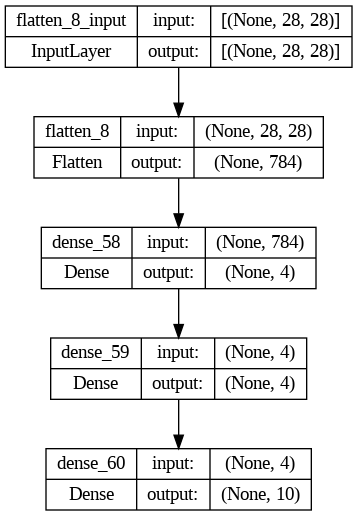

In [139]:
from tensorflow.keras.utils import plot_model

#see inputs and outputs of each layer
plot_model(model_14, show_shapes=True )

#How a model learns (in brief)
Alright, we've trained a bunch of models, but we've never really discussed what's going on under the hood. So how exactly does a model learn?

A model learns by updating and improving its weight matrices and biases values every epoch (in our case, when we call the fit() fucntion).

It does so by comparing the patterns its learned between the data and labels to the actual labels.

If the current patterns (weight matrices and bias values) don't result in a desirable decrease in the loss function (higher loss means worse predictions), the optimizer tries to steer the model to update its patterns in the right way (using the real labels as a reference).

This process of using the real labels as a reference to improve the model's predictions is called backpropagation.

In other words, data and labels pass through a model (forward pass) and it attempts to learn the relationship between the data and labels.

And if this learned relationship isn't close to the actual relationship or it could be improved, the model does so by going back through itself (backward pass) and tweaking its weights matrices and bias values to better represent the data.

